In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [26]:
#load the data set
df=sns.load_dataset("titanic")

Accuracy score = 1.0


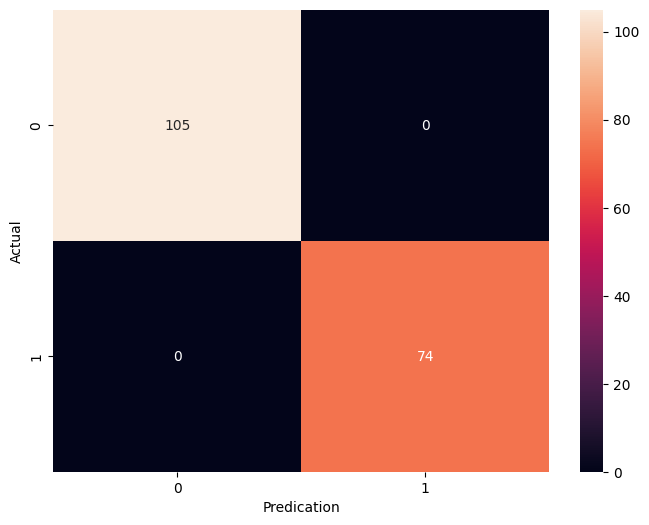

In [31]:
X = df.drop("survived", axis=1)
Y = df['survived']

# Split the data into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('classifier', RandomForestClassifier(random_state=42))

])

# Fit the pipeline on the training data
pipeline.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy score =", accuracy_score(Y_test, y_pred))


#Draw the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True,fmt="d")
plt.xlabel("Predication")
plt.ylabel("Actual")
plt.show()

In [25]:
pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('classifier', RandomForestClassifier(random_state=42))])

# pipeline for hyperparameter


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Load dataset
tit = sns.load_dataset("titanic")

# Feature and target variable
x = tit.drop("survived", axis=1)
y = tit['survived']

# Split the data into train test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Preprocessing for numeric data
numeric_features = ['age', 'fare']
numeric_transformer = SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data
categorical_features = ['embarked', 'sex', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone', 'adult_male']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that combines the preprocessor with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set up the hyperparameter grid
hyperparameters = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search CV
grid = GridSearchCV(pipeline, hyperparameters, cv=5)
grid.fit(X_train, Y_train)

# Get the best model
best_model = grid.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy score =", accuracy_score(Y_test, y_pred))
print("Best parameters =", grid.best_params_)


Accuracy score = 1.0
Best parameters = {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
